# Derivas de concepto en la cadena de bloques. Método Page-Hinkley

Detección de derivas de concepto en el número de transacciones de la cadena de bloques, a partir del método Page-Hinkley, con salida gráfica.

In [1]:
!pip install river

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from btc_connect import btc_connect
from river import drift
import datetime, matplotlib.pyplot as plt

In [3]:
# Conección al nodo local
rpc_connection = btc_connect()

In [4]:
# Intervalo de bloques
start = 800000 # Inicio: 0 
end = 852999 # Para último bloque de la cadena: rpc_connection.getblockcount() 

In [5]:
# Adaptación de función para graficar el total de transacciones por bloque y las derivas de concepto detectadas
# https://riverml.xyz/latest/introduction/getting-started/concept-drift-detection/
def plot_transaction(x, y, xlabel, drift=None):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, color="pink", label="transacciones")
    ax.set_ylim(bottom=0)
    ax.set_title("Número de transacciones por bloque")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Transacciones")
    if drift is not None:
        legend=0
        for drift_detected in drift:
            if legend==0:
                ax.axvline(drift_detected, color="red", linestyle=":", label="derivas de concepto")
                legend=1
            else:
                ax.axvline(drift_detected, color="red", linestyle=":")
    fig.legend(loc="outside upper left")
    plt.show()

In [6]:
block_number = []
transactions = []

# Page-Hinkley Valores por defecto:
# https://riverml.xyz/dev/api/drift/PageHinkley/
# min_instances=30 -> Número mínimo de instancias antes de detectar un cambio
# delta=0.005      -> Factor delta para la prueba de Page-Hinkley
# threshold=50.0   -> Umbral de detección de cambios (lambda)
# alpha=0.9999     -> Factor de descarte, utilizado para ponderar el valor observado y la media
# mode=both        -> Indica si deben considerarse aumentos (up), disminuciones (down) o ambos sentidos, al monitorear la media de desvanecimiento

drift_detector = drift.PageHinkley()

block_drift = []  # Bloques en los que se detecta una deriva de concepto
block_transactions_drift = []  # Total de transacciones de dichos bloques
block_datetime_drift = []  # Marca temporal de los bloques

for i in range (start, end + 1):
    blockhash = rpc_connection.getblockhash(i)  # Obtiene el hash del bloque
    block = rpc_connection.getblock(blockhash)  # Obtiene el bloque
    block_number.append(i)
    transactions.append(block["nTx"])  # Número de transacciones del bloque

    drift_detector.update(block["nTx"])
    if drift_detector.drift_detected:  # Deriva de concepto detectada
        block_drift.append(i)
        block_transactions_drift.append(block["nTx"])
        block_datetime_drift.append(datetime.datetime.fromtimestamp(block["time"]))

xlabel = f"Bloques: {start} a {end}"

### Derivas de concepto detectadas

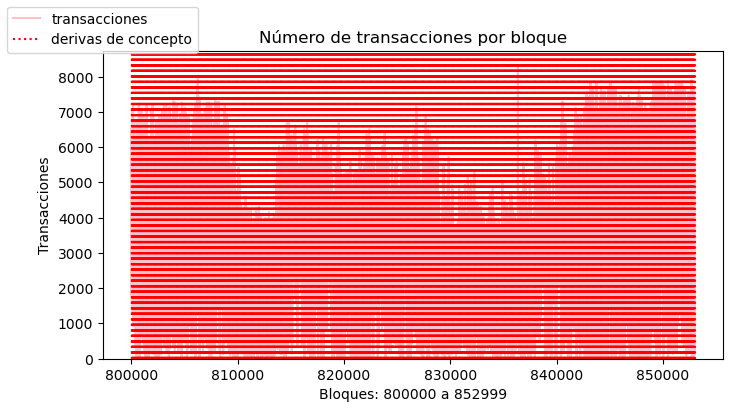

In [7]:
plot_transaction(block_number, transactions, xlabel, block_drift)

### Bloque de comienzo, número de transacciones y marca temporal de minado

In [8]:
for x, y, z in (zip(block_drift, block_transactions_drift, block_datetime_drift)):
    print(f"Bloque {x}: {y} transacciones - {z.strftime('%d/%m/%Y %H:%M:%S')}")

Bloque 800029: 2763 transacciones - 24/07/2023 10:32:46
Bloque 800059: 2089 transacciones - 24/07/2023 15:16:15
Bloque 800089: 2812 transacciones - 24/07/2023 19:16:55
Bloque 800119: 2746 transacciones - 24/07/2023 23:32:32
Bloque 800149: 3222 transacciones - 25/07/2023 05:08:12
Bloque 800179: 1704 transacciones - 25/07/2023 09:18:25
Bloque 800209: 2657 transacciones - 25/07/2023 14:07:27
Bloque 800239: 2124 transacciones - 25/07/2023 20:02:13
Bloque 800269: 2402 transacciones - 26/07/2023 02:24:05
Bloque 800299: 3973 transacciones - 26/07/2023 06:31:43
Bloque 800329: 5418 transacciones - 26/07/2023 11:08:28
Bloque 800359: 1574 transacciones - 26/07/2023 15:55:11
Bloque 800389: 1094 transacciones - 26/07/2023 20:22:44
Bloque 800419: 1983 transacciones - 27/07/2023 03:17:59
Bloque 800449: 3795 transacciones - 27/07/2023 08:28:05
Bloque 800479: 2753 transacciones - 27/07/2023 13:23:33
Bloque 800509: 3915 transacciones - 27/07/2023 18:35:57
Bloque 800539: 2998 transacciones - 28/07/2023 0